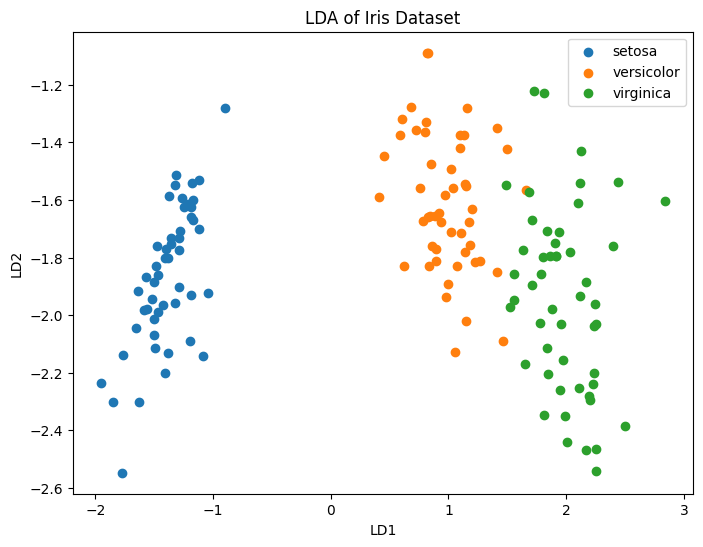

array([[-1.49920971, -1.88675441],
       [-1.2643595 , -1.59214275],
       [-1.35525305, -1.73341462],
       [-1.18495616, -1.62358806],
       [-1.5169559 , -1.94476227],
       [-1.40864014, -2.20148038],
       [-1.28548339, -1.90177269],
       [-1.38431399, -1.80218401],
       [-1.12136823, -1.53021571],
       [-1.31831374, -1.54860234],
       [-1.58367182, -1.98077996],
       [-1.28716445, -1.77562146],
       [-1.31422036, -1.51454424],
       [-1.37605297, -1.58704672],
       [-1.94923317, -2.23514437],
       [-1.77516687, -2.54725756],
       [-1.63024483, -2.302505  ],
       [-1.42847467, -1.96369972],
       [-1.50337736, -2.06783361],
       [-1.48893461, -2.11442674],
       [-1.35700838, -1.75428449],
       [-1.3795792 , -2.13271099],
       [-1.65506386, -2.0431741 ],
       [-1.04356034, -1.92449977],
       [-1.12096094, -1.699853  ],
       [-1.17443134, -1.54228363],
       [-1.18744274, -1.93081847],
       [-1.46468272, -1.86215146],
       [-1.48146353,

In [9]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def lda(X, y, n_components):
    class_labels = np.unique(y)
    mean_vectors = [np.mean(X[y == cls], axis=0) for cls in class_labels]
    
    # Within-class scatter matrix
    S_W = sum(np.cov(X[y == cls].T) for cls in class_labels)
    
    # Between-class scatter matrix
    overall_mean = np.mean(X, axis=0).reshape(-1, 1)
    S_B = np.zeros((X.shape[1], X.shape[1]))  # Initialize S_B
    
    for mean_vec, cls in zip(mean_vectors, class_labels):
        n = X[y == cls].shape[0]
        mean_vec = mean_vec.reshape(-1, 1)  # Reshape to column vector
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

    # Solve the eigenvalue problem
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    sorted_indices = np.argsort(abs(eigenvalues))[::-1]
    X_lda = X.dot(eigenvectors[:, sorted_indices[:n_components]])
    
    return X_lda, eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]

# Load and apply LDA on the Iris dataset
data = load_iris()
X_lda, eigenvalues, eigenvectors = lda(data.data, data.target, n_components=2)

# Visualize the results
plt.figure(figsize=(8, 6))
for label in np.unique(data.target):
    plt.scatter(X_lda[data.target == label, 0], X_lda[data.target == label, 1], label=data.target_names[label])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA of Iris Dataset')
plt.show()
X_lda

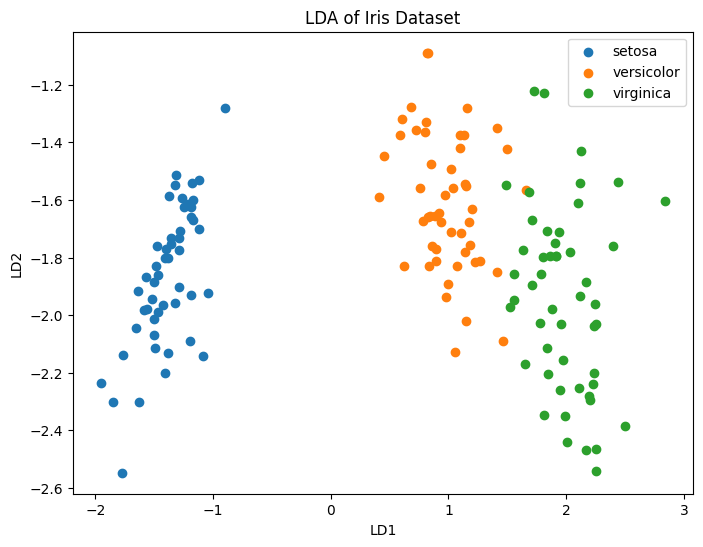

array([[-1.49920971, -1.88675441],
       [-1.2643595 , -1.59214275],
       [-1.35525305, -1.73341462],
       [-1.18495616, -1.62358806],
       [-1.5169559 , -1.94476227],
       [-1.40864014, -2.20148038],
       [-1.28548339, -1.90177269],
       [-1.38431399, -1.80218401],
       [-1.12136823, -1.53021571],
       [-1.31831374, -1.54860234],
       [-1.58367182, -1.98077996],
       [-1.28716445, -1.77562146],
       [-1.31422036, -1.51454424],
       [-1.37605297, -1.58704672],
       [-1.94923317, -2.23514437],
       [-1.77516687, -2.54725756],
       [-1.63024483, -2.302505  ],
       [-1.42847467, -1.96369972],
       [-1.50337736, -2.06783361],
       [-1.48893461, -2.11442674],
       [-1.35700838, -1.75428449],
       [-1.3795792 , -2.13271099],
       [-1.65506386, -2.0431741 ],
       [-1.04356034, -1.92449977],
       [-1.12096094, -1.699853  ],
       [-1.17443134, -1.54228363],
       [-1.18744274, -1.93081847],
       [-1.46468272, -1.86215146],
       [-1.48146353,

In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def lda(X, y, n_components):
    class_labels = np.unique(y)
    
    # Step 1: Compute the mean vectors for each class
    mean_vectors = []
    for cls in class_labels:
        mean_vectors.append(np.mean(X[y == cls], axis=0))
    
    # Step 2: Compute the within-class scatter matrix (S_W)
    n_features = X.shape[1]
    S_W = np.zeros((n_features, n_features))
    for cls, mean_vec in zip(class_labels, mean_vectors):
        class_scatter = np.cov(X[y == cls].T)  # Use the covariance matrix for each class
        S_W += class_scatter
    
    # Step 3: Compute the between-class scatter matrix (S_B)
    overall_mean = np.mean(X, axis=0)
    S_B = np.zeros((n_features, n_features))
    
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == class_labels[i], :].shape[0]
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
    # Step 4: Solve the generalized eigenvalue problem for the matrix S_W^(-1) * S_B
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    
    # Step 5: Sort the eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(abs(eigenvalues))[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    
    # Step 6: Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Step 7: Project the data onto the new subspace
    X_lda = X.dot(selected_eigenvectors)
    
    return X_lda, sorted_eigenvalues, sorted_eigenvectors

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Apply LDA
X_lda, eigenvalues, eigenvectors = lda(X, y, n_components=2)

# Visualize the results
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=data.target_names[label])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA of Iris Dataset')
plt.show()
X_lda